# Loan Application Status Prediction


### Problem Statement:
    
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 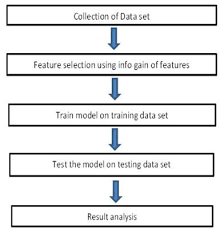


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.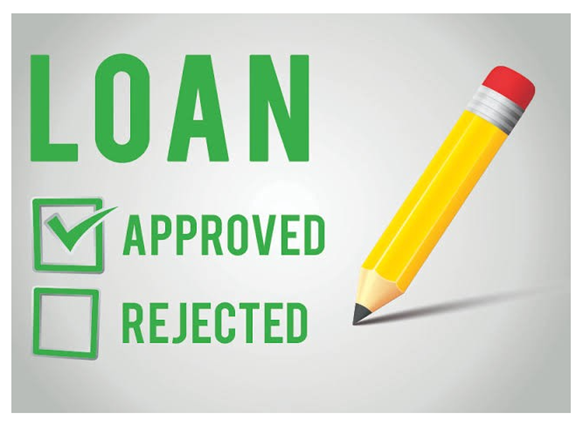


### Attribute Information:

Independent Variables:
    
Loan_ID - This column refer to the unique identifier of the applicant's affirmed purchases

Gender - This column refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

Married - This column refers to applicant being in a state of matrimony

Dependents - This column refres to persons who depends on the applicants for survival

Education - This column refers to number of years in which applicant received systematic instruction, especially at a school or university

Self_Employed - This column refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

Applicant Income - This column refers to disposable income available for the applicant's use under State law.

CoapplicantIncome - This column refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

Loan_Amount - This column refers to the amount of money an applicant owe at any given time.

Loan_Amount_Term - This column refers to the duaration in which the loan is availed to the applicant

Credit History - This column refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

Property_Area - This column refers to the total area within the boundaries of the property as set out in Schedule.

Loan_Status - This column refres to whether applicant is eligible to be availed the Loan requested.


# Reading and Understanding the Data¶

In [48]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading the Dataset

In [50]:
df = pd.read_csv('loan_dataset')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [51]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Observation: Dataset has 1  feature variables.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation: No null values present in data set

In [54]:
nulls = df.isnull().sum().sort_values(ascending=False)
#nulls.fillna("0")
nulls

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Observations: 7 columns in the dataset have null values present in them.Credit_History column have highest number of null values.

In [ ]:
len(df.isnull().sum())

Observation: Here we will replace null values with Mean or Mode of the column values. Using mode works best in pur case,as most columns are binary.Mode will simply place most occuring instance in place  of empty fields. For LoanAmount, i.e. numeric values i use mean since it is not cateogorical variables.

In [56]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )

In [57]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [58]:
df.shape

(614, 13)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations: All null values are removed. Using Pandas methods the fillna() method fills the empty fields with whatever parameter is given. While dropna() will return the column values after removing the NULL values. Calculating the mean or mode of this array of values, and passing it to fillna() completes this step.

The object type values are for categorical data which is further handel using label encoding

In [60]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [61]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [62]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())
print(df['Dependents'].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']
['0' '1' '2' '3+']


Now, next i Convert this categorical values to their binary alternative. "No" is mapped to 0, and "Yes" is mapped to 1.0

'Property_Area' with option 'Urban' 'Rural' 'Semiurban', use get_dummies method of one-hot encodee for encoding them.
Finally ,once all columns are convert into numeric , we fit a StandardScaler module to normalize the numeric variables.


In [63]:
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1}).astype(int)
df = pd.get_dummies(df,columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

standardScaler = StandardScaler()
columns_to_scale = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [64]:
df.shape

(614, 22)

# Step 3: Separating the training and testing data. 

In [65]:
#creating train and test dataset
y = df['Loan_Status']
X = df.drop(['Loan_ID','Loan_Status'], axis = 1)
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size= 0.2,random_state=40)
X_train.shape, X_test.shape

((491, 20), (123, 20))

Here we using popular train_test_split function from sklearn and a split ratio is 80:20 , we create the train and test datset.
    Our final train dataset has nearly 500 samples and 20 columns.next i use it to train different machine learning model.

# Step 4: Buliding a Model 
using XGBOOST,Desicion tree,Random Forest algorithms

In [66]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import xgboost as xgb

In [68]:
#from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
gbm_param_grid = { 'n_estimators': range(1,1000,10),
                 'max_depth': range(1,20),
                 'learning_rate': [.1,.4,.45,.5,.55,.6],
                 'colsample_bytree':[.6, .7, .8, .9, 1]
                 }
xgb_classifier = xgb.XGBClassifier() 
xgb_random = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=gbm_param_grid , n_iter=100, scoring="accuracy", cv=4, verbose=0)

xgb_random.fit(X_train,y_train)
print(f"Best parameters:{xgb_random.best_params_}")

y_pred = xgb_random.predict(X_test)
print(f"Accuracy:{np.sum(y_pred == y_test)/len(y_test)}")

Best parameters:{'n_estimators': 71, 'max_depth': 1, 'learning_rate': 0.45, 'colsample_bytree': 0.6}
Accuracy:0.8373983739837398


After fitting and training the model,cross-validation suggested that the best parameters were {'n_estimators': 551, 'max_depth': 18, 'learning_rate': 0.1, 'colsample_bytree': 0.6}

Testing the test data,we find that the final binary classification accuracy is around 79.6%. 

# Decision Tree

In [69]:
param_grid = {'max_depth' : range(4,25),
             'min_samples_leaf' : range(10,100,10),
             'min_samples_split' : range(10,100,10),
             'criterion':['gini','entropy']
             }
n_folds = 5

dt = DecisionTreeClassifier( random_state = np.random.randint(0,100) )
dt_grid = GridSearchCV(dt, param_grid, cv=n_folds, return_train_score=True, verbose=0)
dt_grid.fit(X_train,y_train)
print(dt_grid.best_params_)

y_pred_best = dt_grid.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred_best)
print(acc)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 60}
0.8373983739837398


Test accuracy for the decision tree is around 83.7% ,better than XGBoost.

# Random Forest Classifier

In [72]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


rf_param_grid ={'n_estimators':range(1,1000,100)}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid , n_iter=100, scoring="accuracy", cv=4, verbose=0)

rf_random.fit(X_train,y_train)
best_params = rf_random.best_params_
print(f"Best parameters: {best_params}")

y_pred1 = rf_random.predict(X_test)
print(f"Accuracy: {np.sum(y_pred1==y_test)/len(y_test)}")

Best parameters: {'n_estimators': 801}
Accuracy: 0.7886178861788617


Accuracy by randomforest 78.8% is almost same as XGBoost,its performance is very close to XGBoost. Thus it could be safe to hypothesize that no more model will learn from our limited dataset.

# Step 5 :Result Analysis (Important Features for Loan Prediction)

We can determine which features the model thought were the most important in making a decision.

In [81]:
def feature_imp(df,model):
    feat = pd.DataFrame(columns=['features','importance'])
    feat["feature"] = df.columns
    feat["importance"] = model.best_estimator_.feature_importances_
    return feat.sort_values(by='importance',ascending = False)

# For Decision Tree

<Figure size 1800x1080 with 0 Axes>

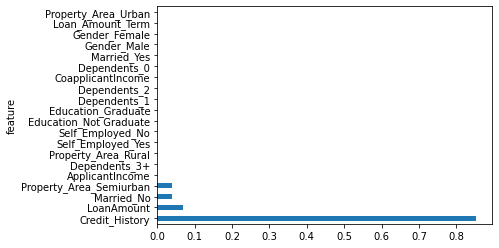

In [82]:
plt.figure(figsize=(25,15))
feature_imp(X_train,dt_grid).plot('feature','importance','barh',legend = False)
plt.show()

Observation: Credit_History is an essential feature for a decision tree to base its final prediction on.All other features added little to no influence over the final prediction.

# For Random Forest

<Figure size 1800x1080 with 0 Axes>

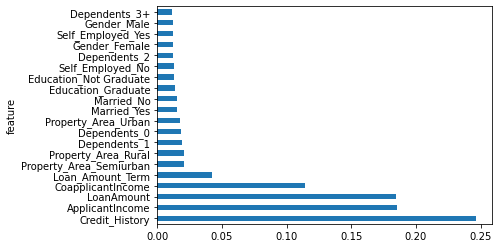

In [83]:
plt.figure(figsize=(25,15))
feature_imp(X_train,rf_random).plot('feature','importance','barh',legend = False)
plt.show()

Observation: 

From above graph i observed Credit_History, Applicantincome, LoanAmount are the features that mostly influence final decision. 

The rest of the features have some but insignificant importance when compared to these.

# For XGBoost

<Figure size 1800x1080 with 0 Axes>

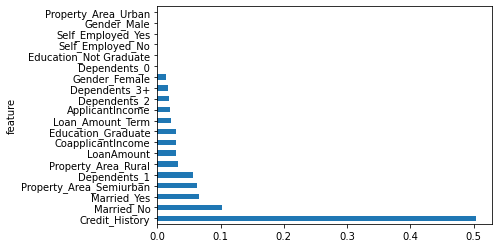

In [84]:
plt.figure(figsize=(25,15))
feature_imp(X_train,xgb_random).plot('feature','importance','barh',legend = False)
plt.show()

Observation: 

XGBoost had a more balanced performance. It found some importance in features like Married_Status, Dependents, Property_Area_Semiurban are features that are considered for taking the loan apprisal decision.
    
Like other model shows Credit_History is the most important feature in making loan Prediction decision.